# Universal Studio Singapore Guest Journey Analysis

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import PercentFormatter
from pathlib import Path
!pip install textblob

from textblob import TextBlob

# Ensure inline plotting 
%matplotlib inline  


  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.5
    Uninstalling nltk-3.6.5:
      Successfully uninstalled nltk-3.6.5


## Load data

In [3]:
csv_path = Path("../../data/survey.csv").resolve()
print(f"Absolute CSV path: {csv_path}")
print(f"File exists? {csv_path.exists()}")

df = pd.read_csv(csv_path)


Absolute CSV path: C:\Users\huiyx\VSCode Projects\Git\data\survey.csv
File exists? True


## Set Visualisation Style 

In [4]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Calculate Net Promoter Score (NPS)

In [5]:
def calculate_nps(recommend_series):
    promoters = (recommend_series == 'Yes').sum()  
    detractors = (recommend_series == 'No').sum()
    total = recommend_series.count()
    return ((promoters - detractors) / total) * 100

nps = calculate_nps(df['Would you recommend USS to others?'])
print(f"Net Promoter Score: {nps:.1f}")

Net Promoter Score: 48.6


## Park Experience Analysis

In [ ]:
def analyze_park_experience(df):
    crowd_concerns = df['What concerns did you have before deciding to visit USS?'].str.contains(
        'Ride wait times and crowd levels', na=False)
    crowd_satisfaction = df.loc[crowd_concerns, 'On a scale of 1-5, how would you rate your overall experience at USS?'].mean()
    print(f"Average satisfaction from visitors concerned about crowds: {crowd_satisfaction:.2f}/5")

analyze_park_experience(df)

### Park Experience and Crowd Concerns Analysis  
####  Impact of Park Experiences on Guest Satisfaction
Based on our calculations, visitors who had concerns about crowd reported an average satisfaction rating of 3.70/5.

This  indicates that crowd-conscious guests may still find value in their visit, though their experience is likely influenced by crowd and waiting time.

This suggests that park experiences could be a barrier to higher guest satisfaction, potentially affecting return visits and word-of-mouth recommendations.

As an effort to analyse guests' park experiences, we will futher analyse how the waiting time of rides correlates with the overall guest satisfaction in the next section.

## Rides and Attractions Analysis

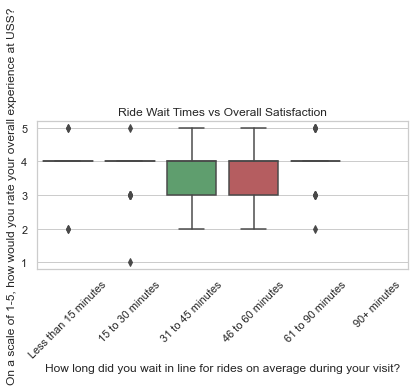

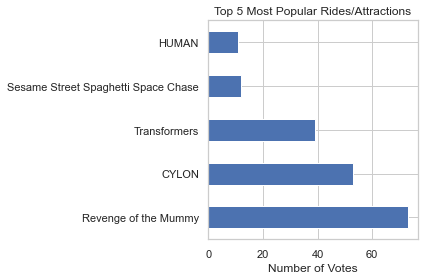

In [29]:
def analyze_rides(df):
    # Ride wait times vs satisfaction
    plt.figure()
    sns.boxplot(x='How long did you wait in line for rides on average during your visit?',
                y='On a scale of 1-5, how would you rate your overall experience at USS?',
                data=df,
                order=['Less than 15 minutes', '15 to 30 minutes', '31 to 45 minutes',
                       '46 to 60 minutes', '61 to 90 minutes', '90+ minutes'])
    plt.title('Ride Wait Times vs Overall Satisfaction')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Most popular rides
    ride_counts = df['Which ride or attraction was your favourite?'].value_counts().head(5)
    plt.figure()
    ride_counts.plot(kind='barh')
    plt.title('Top 5 Most Popular Rides/Attractions')
    plt.xlabel('Number of Votes')
    plt.tight_layout()
    plt.show()

analyze_rides(df)

### Waiting Time vs Guest Satisfaction Analysis
### 1. Satisfaction Trends by Wait Time
#### Median Satisfaction:
All wait time categories (including 61–90 minutes) have a median satisfaction score of 4/5, indicating that most guests rate their experience positively, despite the longer waits.

However, outliers are present which reveals significant variability in guest reactions.

#### Interquartile Range (IQR):

For 31–45 minutes and 46–60 minutes:
The IQR spans 3–4, suggesting that 50% of guests rate satisfaction between 3 and 4.

The IQR whiskers extend to the maximum score of 5, showing that some guests gave top ratings despite the long wait time.

There are no visible boxes for other categories, but median lines and outlier dots suggest similar central tendencies with wider spreads.

#### Outlier Analysis
At Less than 15 minutes:
There are outliers at 2 and 5, indicating rare extreme reactions:
A few guests were very dissatisfied (2/5) even with short waits,  hence suggesting that ride wait time may not directly correlate with the overall guest satisfaction.

At 61–90 minutes:

There exist outliers at 2, 3, and 5, showing polarized reactions:

There were dissatisfaction (2–3/5) due to perceived unreasonable waits. However, on the other end, there is very satisfied ratings (5/5) if the ride experience justified the wait. 

### Interpretation
#### High Median Satisfaction Masks Variability:
While medians are stable at 4 or 5 , outliers highlight critical pain points such as being not satisfied despite short waits, and waiting times not affecting opportunities such guests loving rides despite long waits.

The median of 4 or 5 for 61–90 minutes suggests many guests tolerate long waits if the ride experience is exceptional.

However, outliers at 2–3/5 signal a risk of negative reviews if wait times are poorly managed.

Proving that waiting time is not a big correlation factor for overall guest satisfaction as short waits ≠ guaranteed satisfaction:

### Recommendations:
- Train staff to manage expectations during unexpected delays such as breakdowns or poor weather. 

- Enhance Long Wait Experiences: Queue entertainments such as trivia, preview screens can be added, potentially even awarding the winner with a small token, to keep the guests engaged. 

- Promote the feature of checking wait times on the Universal Studio App and provide accurate real time wait time updates to reduce frustration. Naturally, guests who choose to queue despite the long wait time would imply that the wait time does not affect their overall guest satisfaction directly. 


- Monitor Consistency:
The identical IQR for 31–60 minutes suggests consistent operations. Maintain this average wait time to retain the current guest satisfaction.

## Food and Beverage Analysis

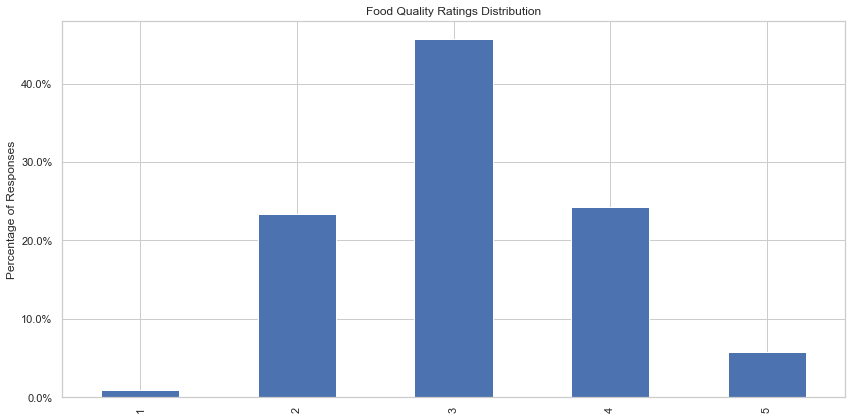

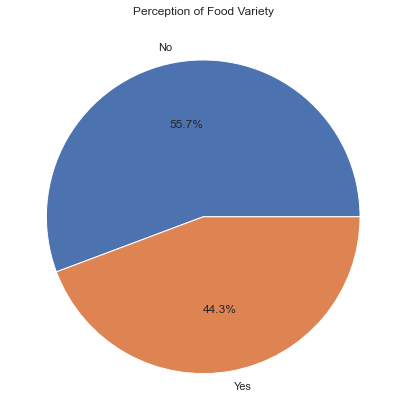

In [7]:
def analyze_food(df):
    # Food quality ratings
    plt.figure()
    df[' How would you rate the food quality and service?  '].value_counts(normalize=True).sort_index().plot(kind='bar')
    plt.title('Food Quality Ratings Distribution')
    plt.ylabel('Percentage of Responses')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.tight_layout()
    plt.show()

    # Food variety
    if df[' Did you find a good variety of food options?  '].dropna().empty:
        print("No data for food variety!")
        return  # Exit if data is missing

    food_variety = df[' Did you find a good variety of food options?  '].value_counts(normalize=True)
    plt.figure()
    food_variety.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Perception of Food Variety')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

analyze_food(df)

## Staff Friendliness Analysis 

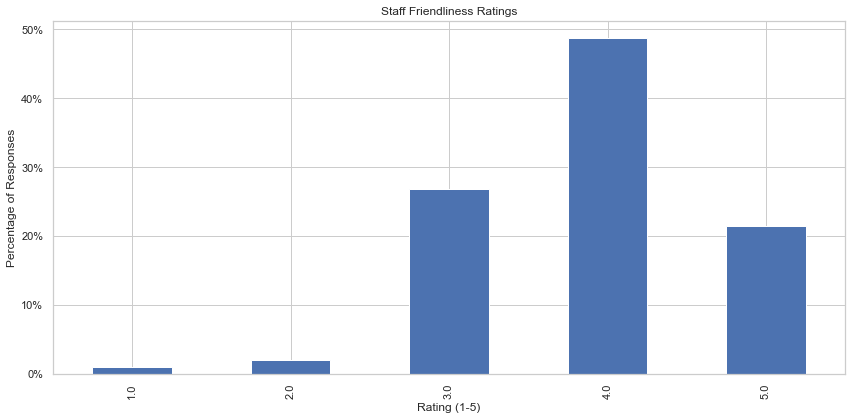

Correlation between staff rating and overall experience: 0.19


In [8]:
# Cell 8: Staff Friendliness Analysis
def analyze_staff(df):
    plt.figure()
    df['Were the park staff at USS friendly and helpful? Rate on a scale from 1-5.'].value_counts(
        normalize=True).sort_index().plot(kind='bar')
    
    plt.title('Staff Friendliness Ratings')
    plt.xlabel('Rating (1-5)')
    plt.ylabel('Percentage of Responses')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.tight_layout()
    plt.show()

    # Correlation between staff rating and overall experience
    staff_corr = df[['Were the park staff at USS friendly and helpful? Rate on a scale from 1-5.',
                    'On a scale of 1-5, how would you rate your overall experience at USS?']].corr().iloc[0,1]
    print(f"Correlation between staff rating and overall experience: {staff_corr:.2f}")

analyze_staff(df)


#### Staff Friendliness & Satisfaction Correlation
The correlation between staff friendliness and overall satisfaction was 0.1p, suggesting a weak positive relationship and does not significantly drive overall guest satisfaction. Thus this is not our top priority when it comes to identifying key factor that affects guest satisfaction. 

##  Pricing & Value Analysis

In [26]:
def analyze_pricing(df):
    # Ticket price concerns
    price_concern = df['What concerns did you have before deciding to visit USS?'].str.contains(
        'Ticket pricing and affordability', na=False)
    price_satisfaction = df[price_concern]['On a scale of 1-5, how would you rate your overall experience at USS?'].mean()
    print(f"Average satisfaction from price-conscious visitors: {price_satisfaction:.2f}/5")

    # Express pass analysis
    express_pass_corr = df[['Did you purchase the Express Pass?',
                            'On a scale of 1-5, how would you rate your overall experience at USS?']].apply(
                               lambda x: x.astype('category').cat.codes).corr().iloc[0,1]
    print(f"Correlation between Express Pass purchase and satisfaction: {express_pass_corr:.2f}")

    # Price concerns by employment status
    employment_price_satisfaction = df[price_concern].groupby('What is your employment status?')[
        'On a scale of 1-5, how would you rate your overall experience at USS?'].mean().sort_values()

    print("\nAverage satisfaction from price-conscious visitors by employment status:")
    print(employment_price_satisfaction)

analyze_pricing(df)


Average satisfaction from price-conscious visitors: 3.66/5
Correlation between Express Pass purchase and satisfaction: 0.11

Average satisfaction from price-conscious visitors by employment status:
What is your employment status?
Student       3.616667
Employed      3.833333
Unemployed    4.000000
Name: On a scale of 1-5, how would you rate your overall experience at USS?, dtype: float64


### Pricing & Value Perception Analysis at USS

####  Impact of Ticket Pricing on Guest Satisfaction
Based on our calculations, visitors who had concerns about ticket pricing and affordability reported an average satisfaction rating of 3.66/5.

This  indicates that price-conscious guests may still find value in their visit, though their experience is likely influenced by perceived affordability.
This suggests that pricing concerns could be a barrier to higher guest satisfaction, potentially affecting return visits and word-of-mouth recommendations.

#### Express Pass & Satisfaction Correlation
The correlation between purchasing an Express Pass and overall satisfaction was 0.11, suggesting aq weak positive relationship and does not significantly drive overall guest satisfaction.

####  Satisfaction by Employment Status
For further analysis, we segmented price-conscious visitors by employment status, and here is our observations:

Students reported an average satisfaction of 3.62/5, slightly lower than the overall price-conscious group. This suggests that price affects students the most when it comes to their overall guest satisfaction. 

Employed visitors had a higher satisfaction score of 3.83/5, indicating that they may have higher disposable income and feel that the experience is worth the cost.

Unemployed visitors had the highest satisfaction at 4.00/5, which might be counterintuitive. This may imply that unemployed guests may have lower expectations or appreciate the experience more despite pricing concerns due to other factors. 

#### Conclusion & Recommendations
Pricing concerns affect student satisfaction the most, as compared to the other groups. 
One recommendation includes: Universal Studio Singapore could consider student discounts or off-peak promotions to enhance affordability and attract more students, as well as improve guest satisfaction in the student group.

## Sentimental Analysis Visualisation

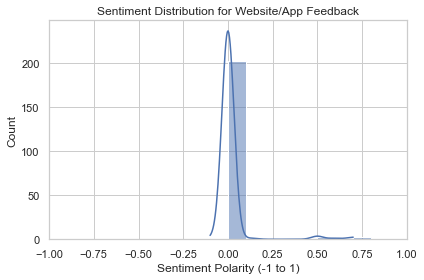

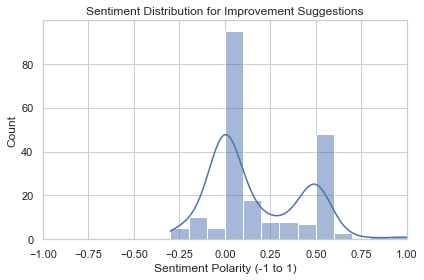

In [22]:
# new column name 
WEBSITE_FEEDBACK_COL = 'What feedback/suggestions would you like to provide for USS website/app?'
IMPROVEMENTS_COL = 'What changes or improvements would make your next visit better?  ' 

def get_sentiment(text):
    if pd.isna(text) or str(text).strip() in ['', 'NIL', 'Nil', 'NA']:
        return 0  # Neutral for empty/missing values
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply sentiment analysis 
df['Website_App_Sentiment'] = df[WEBSITE_FEEDBACK_COL].apply(get_sentiment)
df['Improvements_Sentiment'] = df[IMPROVEMENTS_COL].apply(get_sentiment)

def analyze_sentiment(df):
    # Plot sentiment distribution for website/app feedback
    plt.figure()
    sns.histplot(df['Website_App_Sentiment'], bins=np.arange(-1, 1.1, 0.1), kde=True)
    plt.title('Sentiment Distribution for Website/App Feedback')
    plt.xlabel('Sentiment Polarity (-1 to 1)')
    plt.xlim(-1, 1)
    plt.tight_layout()
    plt.savefig('website_app_feedback_sentiment.png')
    plt.show()

    # Plot for improvement suggestions
    plt.figure()
    sns.histplot(df['Improvements_Sentiment'], bins=np.arange(-1, 1.1, 0.1), kde=True)
    plt.title('Sentiment Distribution for Improvement Suggestions')
    plt.xlabel('Sentiment Polarity (-1 to 1)')
    plt.xlim(-1, 1)
    plt.tight_layout()
    plt.savefig('improvement_suggestions_sentiment.png')
    plt.show()

    # Calculate correlation with overall experience
    sentiment_corr = df[['Website_App_Sentiment', 'Improvements_Sentiment',
                        'On a scale of 1-5, how would you rate your overall experience at USS?']].corr()
  
analyze_sentiment(df)

We use Sentimental Analysis to look at guests' written feedback about the website and suggested improvements. 

1. Weak correlation between Sentiment and Overall Experience Rating
The correlation values between the sentiment scores (Website/App Sentiment & Improvements Sentiment) and the overall experience rating are very close to zero (0.0256 and -0.0254).

2. Negative Correlation Between Improvements Sentiment and Overall Experience
The Improvements Sentiment has a slightly negative correlation (-0.0254) with the overall experience rating, which is also close to 0, hence the effect is minimal. 

Hence, it suggests that these factors do not strongly influence their overall experience rating at Universal Studios Singapore (USS).

## Correlation Heatmap

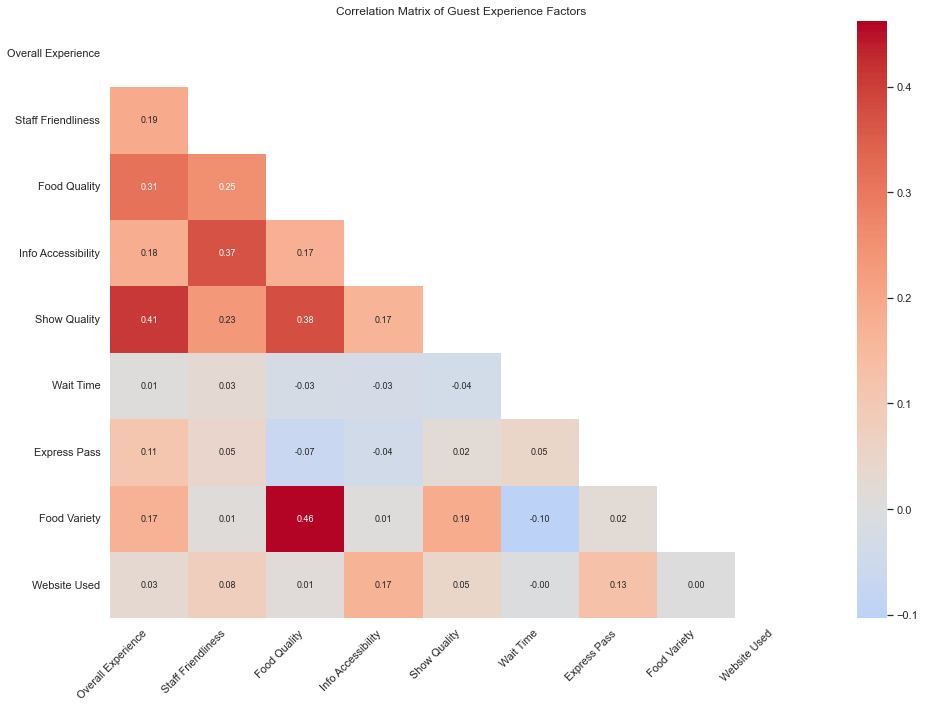

In [ ]:
def correlation_analysis(df):
    # Prepare data 
    corr_df = df.copy()
    
    # Convert categorical features to numerical
    wait_time_order = ['Less than 15 minutes', '15 to 30 minutes', 
                      '31 to 45 minutes', '46 to 60 minutes',
                      '61 to 90 minutes', 'More than 90 minutes']
    corr_df['Wait Time Score'] = corr_df['How long did you wait in line for rides on average during your visit?']\
        .map({k:v for v,k in enumerate(wait_time_order)})
    
    corr_df['Express Pass'] = corr_df['Did you purchase the Express Pass?'].map({'Yes': 1, 'No': 0})
    
    # Convert other categorical features
    binary_map = {'Yes': 1, 'No': 0}
    corr_df['Food Variety'] = corr_df[' Did you find a good variety of food options?  '].map(binary_map)
    corr_df['Website Used'] = corr_df['Did you visit the USS website while planning your trip?'].map(binary_map)
    
    # Select relevant numerical columns
    corr_columns = {
        'On a scale of 1-5, how would you rate your overall experience at USS?': 'Overall Experience',
        'Were the park staff at USS friendly and helpful? Rate on a scale from 1-5.': 'Staff Friendliness',
        ' How would you rate the food quality and service?  ': 'Food Quality',
        'How easy was it to find relevant information about USS online (ticket pricing, attractions, events, etc.)?': 'Info Accessibility',
        ' Were the shows and performances engaging and enjoyable?  ': 'Show Quality',
        'Wait Time Score': 'Wait Time',
        'Express Pass': 'Express Pass',
        'Food Variety': 'Food Variety',
        'Website Used': 'Website Used'
    }

    # Rename the columns in the DataFrame
    corr_df.rename(columns=corr_columns, inplace=True)
    
    # Convert brand image with one-hot encoding
    brand_dummies = pd.get_dummies(corr_df['How would you describe USS\' brand image before visiting?'], 
                                  prefix='Brand')
    corr_df = pd.concat([corr_df, brand_dummies], axis=1)
    
    # Select and rename numerical columns
    corr_df = corr_df[list(corr_columns.values()) + list(brand_dummies.columns)]
    
    # Calculate correlations
    corr_matrix = corr_df.corr()
    
    selected_columns = list(corr_columns.values())  
    corr_subset = corr_matrix.loc[selected_columns, selected_columns]  # Extract relevant correlation sub-matrix

    #9x9 correlation matrix
    mask = np.triu(np.ones(corr_subset.shape, dtype=bool)) 

    # Plot the heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0,
                annot_kws={'size': 9}, fmt=".2f", mask=mask)
    plt.title('Correlation Matrix of Guest Experience Factors')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.show()

correlation_analysis(df)

This correlation analysis highlights the key drivers of guest satisfaction across different touchpoints, with food quality, entertainment, and service accessibility playing significant roles.

1. Food Quality & Variety: A strong correlation (0.46) is exhibited between food variety and food quality suggesting that guests perceive these factors as interconnected. In addition, food quality has a ripple effect, that is correlated and linked with both show quality (0.38) and overall experience (0.31), suggessting that there is an indirect influence on guest satisfaction.
Thus, a suggestion to improve guest satisfaction through this finding is to expand menu options and maintain consistent food qualiy. 

2. Entertainment & Overall Experience: There exists a notable correlation (0.41) between overall experience and show quality. This highlights the role of entertainment in shaping guest satisfaction in the Universal Studio of Singapore. High-quality shows enhance the overall theme park experience, especially when paired with other elements like dining. A
Thus, a suggestion to improve guest satisfaction is to prioritize impactful performances and good quality rides.

## Revisiting Sentiments

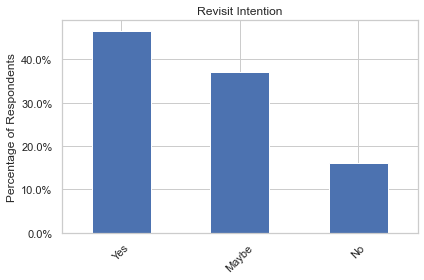

Yes      0.466667
Maybe    0.371429
No       0.161905
Name: Would you choose to revisit USS?, dtype: float64


In [25]:
def analyze_post_visit(df):
    # Revisit intention
    revisit_dist = df['Would you choose to revisit USS?'].value_counts(normalize=True)
    plt.figure()
    revisit_dist.plot(kind='bar')
    plt.title('Revisit Intention')
    plt.ylabel('Percentage of Respondents')
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.tight_layout()
    plt.savefig('revisit_intention.png')
    plt.show()

    print(revisit_dist)
analyze_post_visit(df)


We use Sentimental Analysis to analyse guest revisit intention at USS.

### Key Findings on Revisit Intention
- 46.67% of respondents stated they would revisit USS ("Yes"), indicating strong guest satisfaction.
- 37.14% were uncertain ("Maybe"), suggesting that their experience had both positive and negative aspects.
- 16.19% stated they would not return ("No"), pointing to areas where improvement is needed.

The relatively high percentage of "Maybe" responses suggests that guest satisfaction is not consistently high, and their decision to return depends on specific factors. However, the number of responses saying "No" is relatively low at 16.2%, indicating that there is not much resistance to revisiting the theme park.